In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from transform import one_hot_dataframe, scale_dataframe, impute_dataframe

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

In [42]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [43]:
train, test = impute_dataframe(train, test)
#train, val = train_test_split(train, test_size=0.4)
#train, val = impute_dataframe(train, val)

In [44]:
train.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,3.59025,-0.117558,0.558392,0.405572,8,0.430972,75751,0.2254,11,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1251507.965681,1564384.957101
1,2,3.59025,-0.117558,0.558392,0.405572,3,0.388896,17369,0.0166,13,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1733950.349065,2167437.936331
2,3,3.59025,-0.696727,0.739591,-0.167928,9,0.471947,8277,0.3650,9,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1529197.383151,1911496.728938
3,4,3.59025,-0.694350,1.568248,0.479073,5,0.120653,22508,0.2654,13,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1711569.423695,2139461.779618
4,5,6.00000,-1.736489,2.765531,1.245280,7,4.866985,22423,0.2138,13,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1267270.264754,1584087.830943


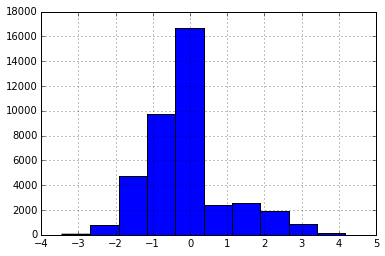

In [45]:
train['Feature_2'].hist()

In [46]:
returns = train.loc[:,'Ret_2':'Ret_180']
#np.mean(train.loc[:,'Ret_2':'Ret_180'])
log_prices = returns.cumsum()

# AR processes

In [47]:
from statsmodels.tsa.ar_model import AR

In [48]:
#process = AR(returns.loc[50].values)
#fitted_process = process.fit(30)
#params = fitted_process.params
#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.plot(process.predict(params))
#ax.plot(returns.loc[50].values)

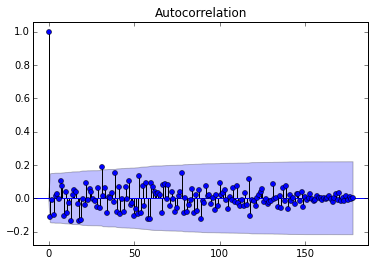

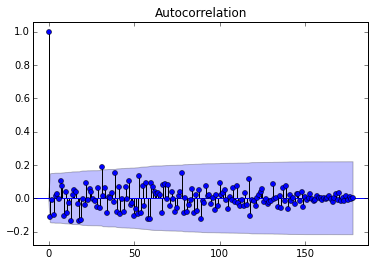

In [49]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(returns.loc[50].values)

# KMeans

In [50]:
X = train.loc[:,'Feature_1':'Feature_25'].values

In [137]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5,whiten=True)
X_r = pca.fit_transform(X)
pca.explained_variance_

array([  7.97613766e+08,   2.39959424e+01,   1.43957917e+01,
         7.75578885e+00,   6.71299846e+00])

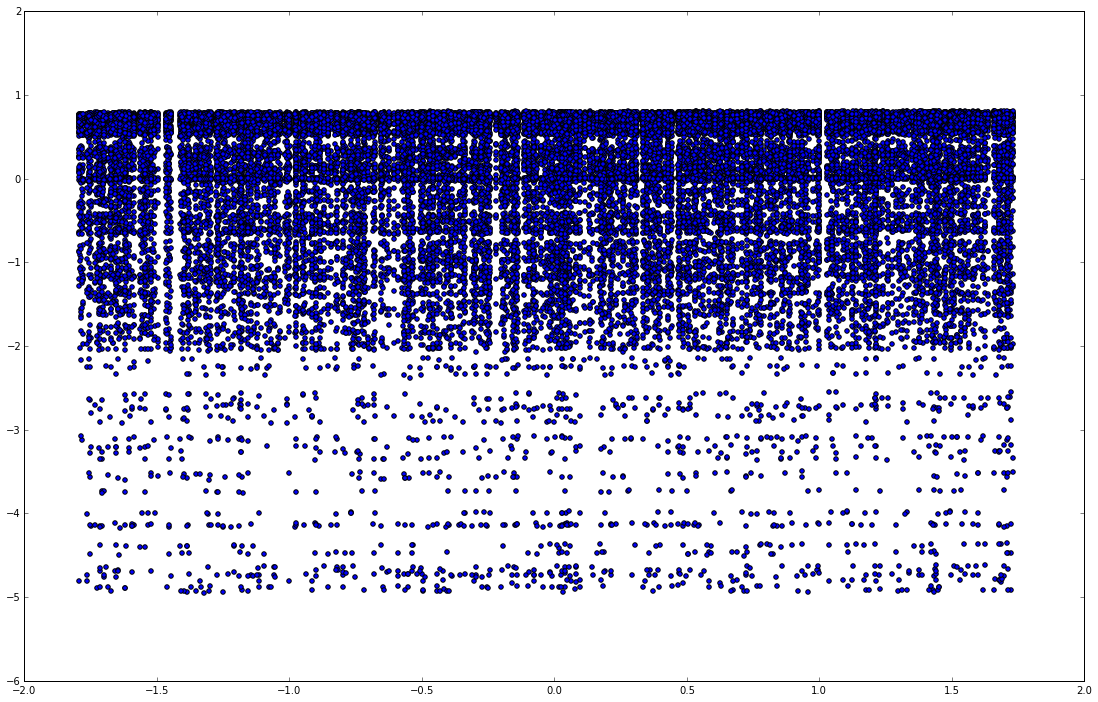

In [138]:
plt.scatter(X_r[:,0], X_r[:,1])

In [53]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=8,n_init=pca.components_)
#kmeans.fit(X)

# Some plots

In [54]:
import sys
sys.path.append('/Users/massil/Programmation/')
import finance

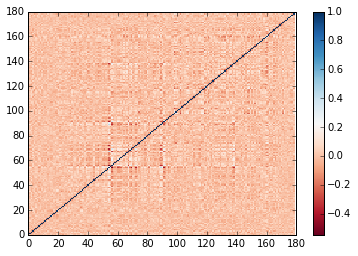

In [55]:
from finance.statphy.stiff_propagator import propagator
propagator = np.corrcoef(returns,rowvar=0)
plt.pcolor(propagator,cmap='RdBu')
plt.colorbar()
plt.show()
plt.close()

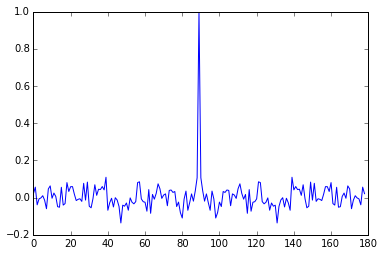

In [56]:
plt.plot(np.diag(propagator[::-1],k=0))

# find the stiff parameters

In [57]:
#from finance.statphy.stiff_propagator import get_estimated_params
#params0 = (1.,0.01)
#x = get_estimated_params(params0, propagator)
#print(x)

In [58]:
#from bokeh._legacy_charts import HeatMap, output_file, show

# pandas magic
#df = pd.DataFrame(propagator)
#df2 = df.set_index(df[df.columns[0]].astype(str))
#df2.drop(df.columns[0], axis=1, inplace=True)
#df3 = df2.transpose()

#output_file("heatmap.html")

#hm = HeatMap(propagator)
#show(hm)

# naives plots

In [59]:
np.mean(returns.loc[200][:60])

2.7668796479551173e-05

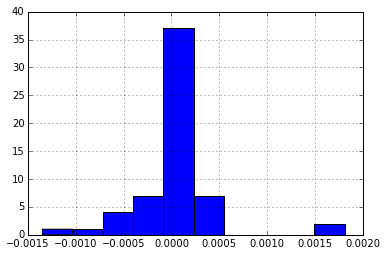

In [60]:
returns.loc[200][61:120].hist()

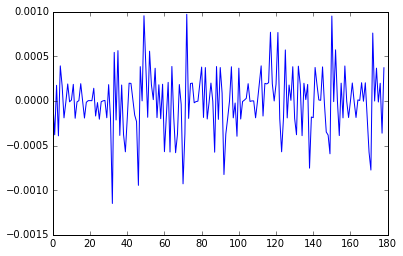

In [61]:
plt.plot(returns.loc[50])

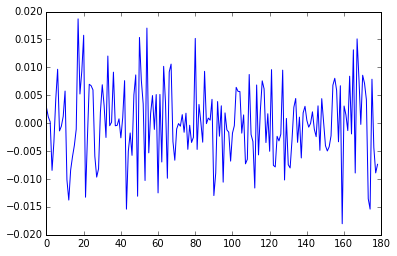

In [62]:
plt.plot(log_prices.loc[50])

In [94]:
def get_cumulants(index, start, end, maxorder=6):
    from finance.statphy.cumulants import cumulant
    time_indices = np.arange(start,end)
    res = np.zeros(maxorder)
    for s in range(maxorder):
        res[s] = cumulant(returns.loc[index][time_indices],n=s+1)
    return res

In [95]:
ind=60
maxord=2

In [103]:
cumulants1 = np.array([get_cumulants(ind,start=0,end=60,maxorder=4) for ind in range(returns.shape[0])])

In [112]:
cumulants2 = np.array([get_cumulants(ind,start=61,end=120,maxorder=4) for ind in range(returns.shape[0])])

In [114]:
cumulants3 = np.array([get_cumulants(ind,start=121,end=179,maxorder=4) for ind in range(returns.shape[0])])

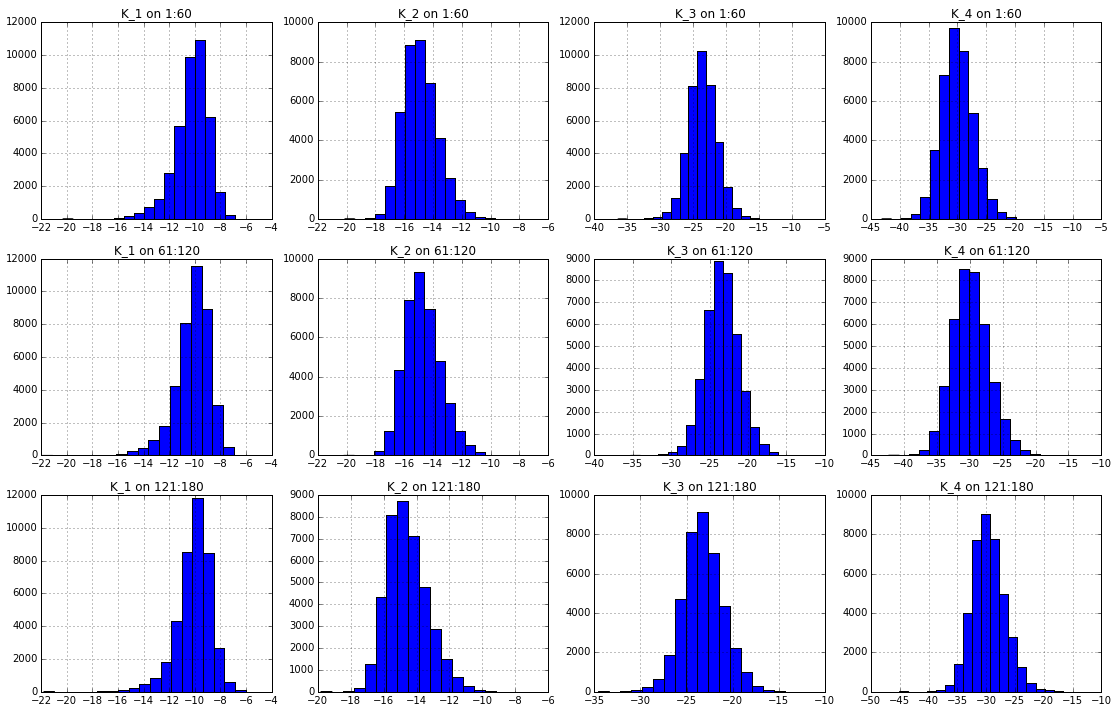

In [136]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (19.0, 12.0)

for i in range(3):
    for j in range(4):
        plt.subplot(3, 4, 1+4*i+j)
        if i == 0:
            pd.Series(np.log(abs(cumulants1))[:,j]).hist(bins=20)
            plt.title("K_%s on 1:60" % int(j+1))
        elif i == 1:
            pd.Series(np.log(abs(cumulants2))[:,j]).hist(bins=20)
            plt.title("K_%s on 61:120" % int(j+1))
        elif i == 2:
            pd.Series(np.log(abs(cumulants3))[:,j]).hist(bins=20)
            plt.title("K_%s on 121:180" % int(j+1))